In [1]:
import mysql.connector
from mouseBehavior import mouseBehaviorData as mbd
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np

In [9]:
mouseID = '486632'

In [10]:
def checkforpickle(directory, mouseID):
    pkllist = [f for f in os.listdir(directory) if '.pkl' in f]
    mouseID = str(mouseID)
    pklpath = None
    for pkl in pkllist:
        if pkl[:6]==mouseID:
            pklpath = os.path.join(directory, pkl)
    return pklpath

In [11]:
pkldir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline"
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"

In [12]:
#First look to see if there's already a pkl file with this mouse' data
pklpath = checkforpickle(pkldir, mouseID)

if pklpath is not None:
    print('reading from pickle')
    m = mbd()
    m.loadFromPickle(pklpath)
    m.add_weight_and_water_history()
    m.calculate_behavior_metrics()
    m.add_metadata_to_dataframe()
    m.beh_df.drop(columns=['cumulative_rewards'], inplace=True)
    m.save_dataframe_separately(dataframe_save_dir)

else:
    print('fetching data')
    m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
    m.buildBehaviorDataframe(all_sessions=True)

# m.saveDirectory = pkldir
# m.saveToPickle()

fetching data


Text(0.5,1,u'Wt_g - WE_ml: inferred pre-session weight')

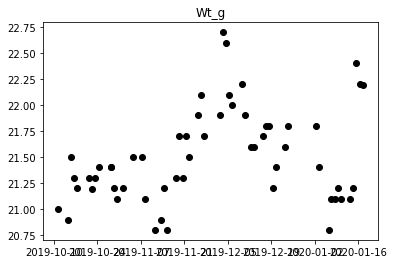

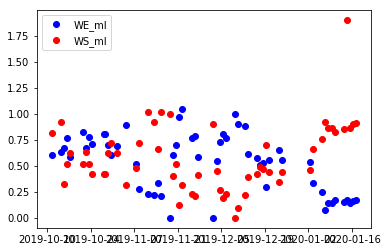

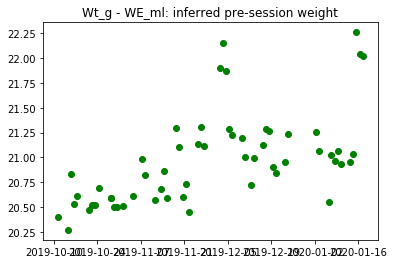

In [14]:
fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['Wt_g'], 'ko')
ax.set_title('Wt_g')

fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['WE_ml'], 'bo')
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['WS_ml'], 'ro')
ax.legend(['WE_ml', 'WS_ml'])

fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], np.array(m.beh_df['Wt_g'].astype(float) - m.beh_df['WE_ml'].astype(float)), 'go')
ax.set_title('Wt_g - WE_ml: inferred pre-session weight')


In [15]:
m.beh_df[['session_datetime_local', 'Wt_g', 'stage']]

,session_datetime_local,Wt_g,stage
0,2020-01-17 08:36:48.344000-08:00,22.19,TRAINING_5_images_A_handoff_ready
1,2020-01-16 09:41:32.149000-08:00,22.20,TRAINING_5_images_A_handoff_ready
2,2020-01-15 09:06:57.435000-08:00,22.40,TRAINING_5_images_A_handoff_ready
3,2020-01-14 10:17:15.225000-08:00,21.20,TRAINING_5_images_A_handoff_ready
4,2020-01-13 10:09:37.778000-08:00,21.10,TRAINING_5_images_A_handoff_lapsed
5,2020-01-10 10:37:40.982000-08:00,21.10,TRAINING_5_images_A_handoff_lapsed
6,2020-01-09 10:23:09.143000-08:00,21.20,TRAINING_5_images_A_handoff_lapsed
7,2020-01-08 10:26:31.660000-08:00,21.10,TRAINING_5_images_A_handoff_lapsed
8,2020-01-07 08:44:56.213000-08:00,21.10,TRAINING_5_images_A_handoff_ready
9,2020-01-06 09:54:39.389000-08:00,20.80,TRAINING_5_images_A_handoff_ready


In [16]:
m.beh_df.head()

,id,behavior_training_id,created_at,updated_at,storage_directory,temp_output_file_location,foraging_id,donor_id,ophys_session_id,equipment_id,...,earned_rewards,total_rewards,Maternal_Index,Paternal_Index,age,baseline_weight,WE_ml,WS_ml,weight_datetime,Wt_g
0,1000742256,None,2020-01-17 18:10:46.100029,2020-01-17 18:10:58.615962,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,5c267d6e-e663-42c1-a1ea-26d70401f78d,940767794,None,791748416,...,21,26,474206,470927,181,25.67,0.17,0.91,2020-01-17 09:55:14,22.19
1,1000581466,None,2020-01-16 19:01:10.612519,2020-01-16 19:01:12.262922,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,da131079-c88e-45f0-be8c-c3a46a5117b6,940767794,None,791748416,...,19,24,474206,470927,180,25.67,0.16,0.90,2020-01-16 10:57:50,22.20
2,1000351718,None,2020-01-15 18:26:03.128900,2020-01-15 18:26:04.643763,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,3bb40308-6f89-4cae-89e0-6b868aedf7fe,940767794,None,791748416,...,17,22,474206,470927,179,25.67,0.14,0.86,2020-01-15 10:26:38,22.40
3,1000062512,None,2020-01-14 19:36:03.904760,2020-01-14 19:36:04.430552,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,359b2765-dff4-4c9a-a6d9-4f26a61b9421,940767794,None,791748416,...,21,26,474206,470927,178,25.67,0.17,1.90,2020-01-14 11:34:19,21.20
4,999775754,None,2020-01-13 19:25:57.861538,2020-01-13 19:25:58.511898,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,684b6525-3c74-4143-a45f-6d4dd5dbb2f1,940767794,None,791748416,...,18,23,474206,470927,177,25.67,0.15,0.85,2020-01-13 11:30:31,21.10
